In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
weather_data = pd.read_csv("weatherHistory.csv")

In [5]:
print(weather_data.head())

                  Formatted Date        Summary Precip Type  Temperature (C)   
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222  \
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)   
0                  7.388889      0.89            14.1197  \
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)   
0                   251.0          15.8263         0.0               1015.13  

In [6]:
# Removing duplicates
weather_data = weather_data.drop_duplicates()

In [7]:
weather_data = weather_data.dropna(subset=['Temperature (C)', 'Wind Speed (km/h)', 'Humidity'])

In [8]:
# Data type conversion
weather_data['Temperature (C)'] = weather_data['Temperature (C)'].astype(int)

In [9]:
# Data filtering and selection
high_temp_data = weather_data[weather_data['Temperature (C)'] > 30]
selected_columns = ['Temperature (C)', 'Wind Speed (km/h)']
selected_data = weather_data[selected_columns]

In [19]:
average_temp_by_month = weather_data.groupby('Formatted Date')['Temperature (C)'].mean()
count_by_weather_condition = weather_data['Precip Type'].value_counts()

In [18]:
fig3 = px.histogram(weather_data, x='Temperature (C)', title='Temperature Distribution')
fig3.show()

In [ ]:
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True)

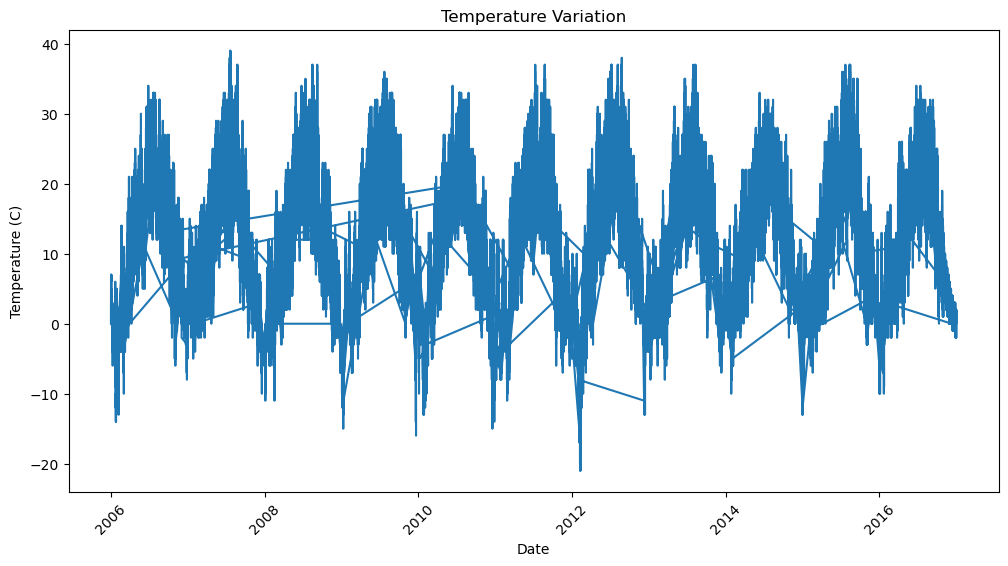

In [46]:
date_array = np.array(weather_data['Formatted Date'])
temp_array = np.array(weather_data['Temperature (C)'])

# Line Plot Temperature (C) over time
plt.figure(figsize=(12, 6))
plt.plot(date_array, temp_array)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Variation')
plt.xticks(rotation=45)
plt.show()

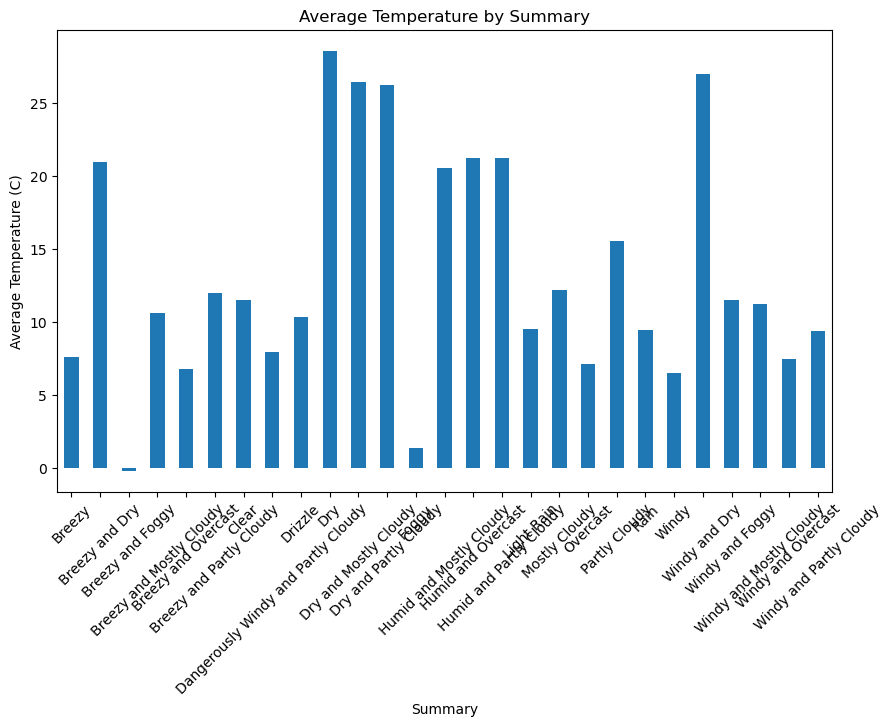

In [49]:
# Calculate the average Temperature (C) by Summary
summary_temp = weather_data.groupby('Summary')['Temperature (C)'].mean()

# Plot the average Temperature (C) by Summary
plt.figure(figsize=(10, 6))
summary_temp.plot(kind='bar')
plt.xlabel('Summary')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature by Summary')
plt.xticks(rotation=45)
plt.show()

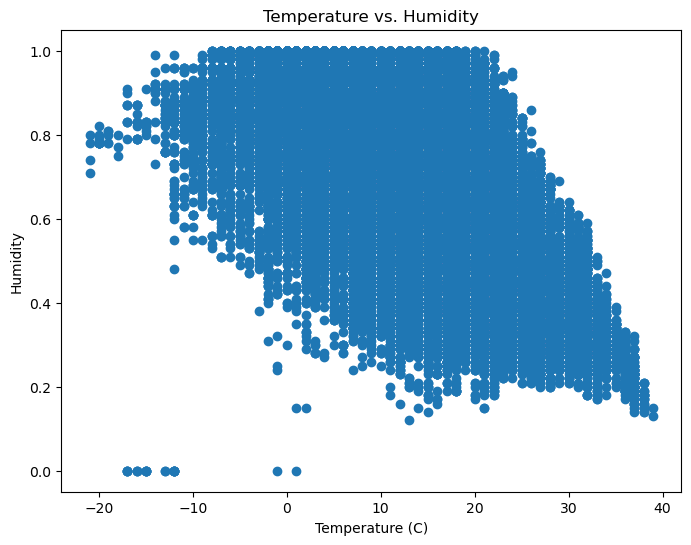

In [50]:
# Plot a scatter plot of Temperature (C) vs. Humidity
plt.figure(figsize=(8, 6))
plt.scatter(weather_data['Temperature (C)'], weather_data['Humidity'])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

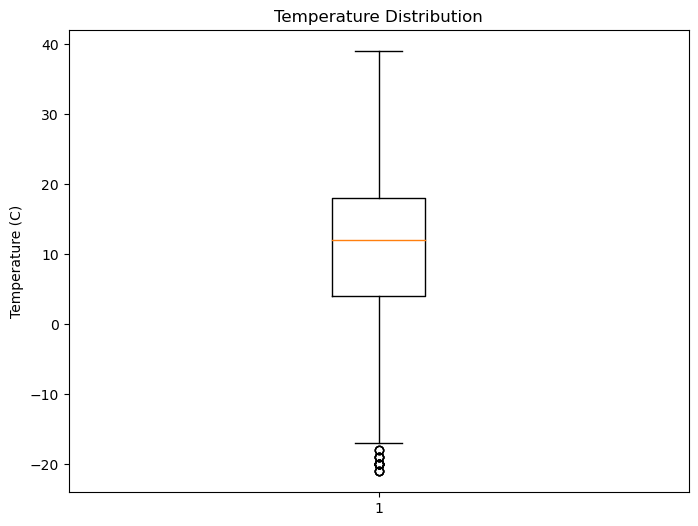

In [51]:
# Plot a box plot of Temperature (C)
plt.figure(figsize=(8, 6))
plt.boxplot(weather_data['Temperature (C)'])
plt.ylabel('Temperature (C)')
plt.title('Temperature Distribution')
plt.show()

<Figure size 2000x1200 with 0 Axes>

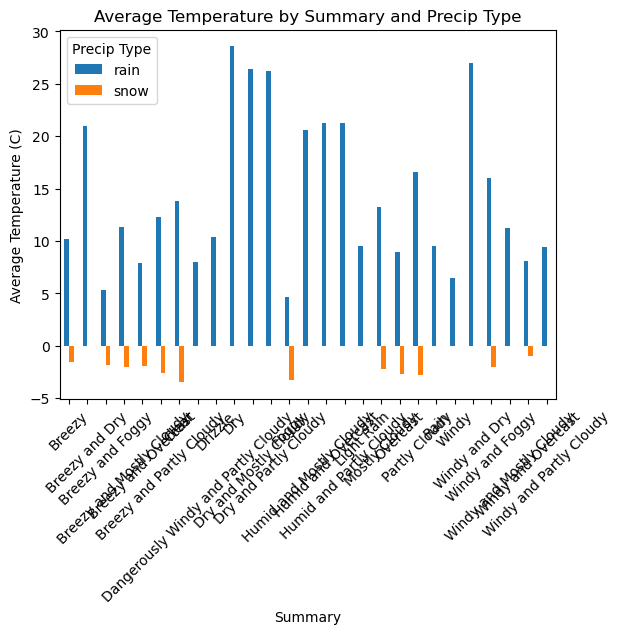

In [53]:
# Calculate the average Temperature (C) by Summary and Precip Type
summary_precip_temp = weather_data.groupby(['Summary', 'Precip Type'])['Temperature (C)'].mean().unstack()

# Plot the average Temperature (C) by Summary and Precip Type
plt.figure(figsize=(20,12))
summary_precip_temp.plot(kind='bar')
plt.xlabel('Summary')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature by Summary and Precip Type')
plt.xticks(rotation=45)
plt.legend(title='Precip Type')
plt.show()

In [54]:
# Filter out non-numeric columns
numeric_columns = weather_data.select_dtypes(include='number')

In [55]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

In [56]:
print(correlation_matrix)

                          Temperature (C)  Apparent Temperature (C)  Humidity   
Temperature (C)                  1.000000                  0.991643 -0.635984  \
Apparent Temperature (C)         0.991643                  1.000000 -0.602641   
Humidity                        -0.635984                 -0.602641  1.000000   
Wind Speed (km/h)                0.006829                 -0.056324 -0.225080   
Wind Bearing (degrees)           0.029213                  0.028926  0.000689   
Visibility (km)                  0.389478                  0.381804 -0.369282   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005655                 -0.000251  0.005456   

                          Wind Speed (km/h)  Wind Bearing (degrees)   
Temperature (C)                    0.006829                0.029213  \
Apparent Temperature (C)          -0.056324                0.028926   
Humidity                          -0.225080              

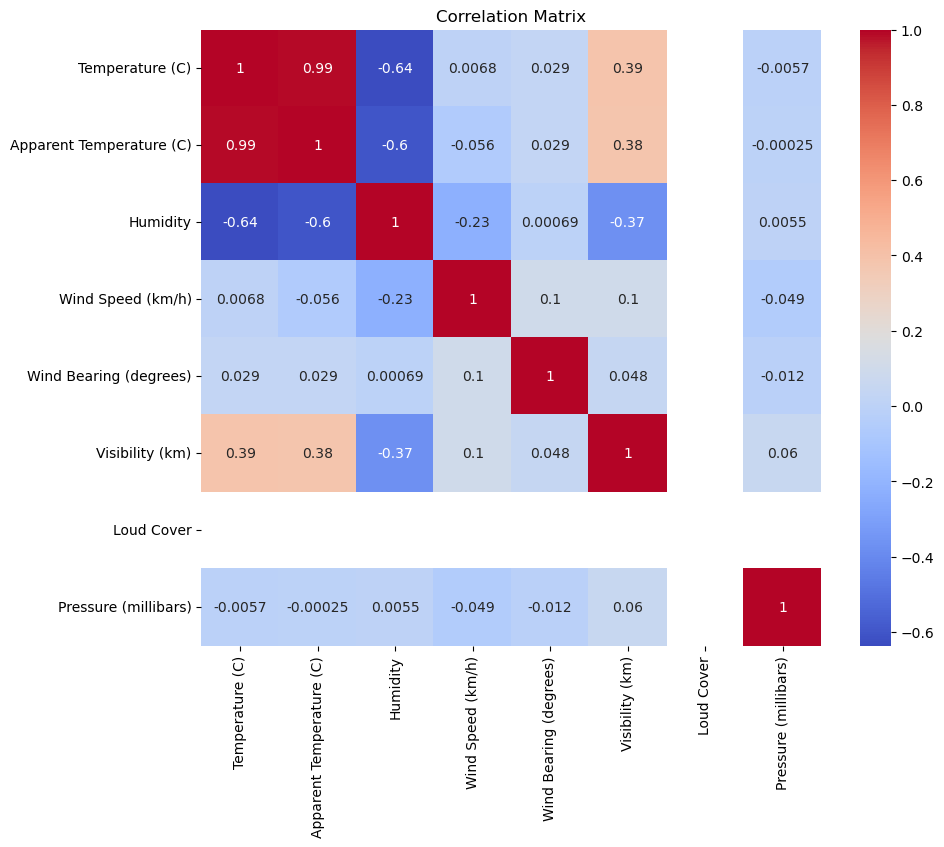

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()